In [ ]:
#!/bin/bash
!pip install transformers datasets torch torchvision kaggle
!kaggle datasets download mahmudulhasantasin/fracatlas-original-dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
Dataset URL: https://www.kaggle.com/datasets/mahmudulhasantasin/fracatlas-original-dataset
License(s): CC0-1.0
100% 323M/323M [00:06<00:00, 32.1MB/s]
100% 323M/

In [ ]:
!unzip fracatlas-original-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: FracAtlas/Annotations/YOLO/IMG0003207.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003208.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003209.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003210.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003211.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003212.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003213.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003214.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003215.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003216.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003217.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003218.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003219.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003220.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003221.txt  
  inflating: FracAtlas/Annotations/YOLO/IMG0003222.txt  
  inflating: FracAtlas/Annotations/YO

In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.utils import resample


In [ ]:
!pip install pandas seaborn matplotlib missingno geopandas

In [ ]:
!pip install pandas matplotlib seaborn opencv-python


         image_id  hand  leg  hip  shoulder  mixed  hardware  multiscan  \
0  IMG0000000.jpg     0    1    0         0      0         0          1   
1  IMG0000001.jpg     0    1    0         0      0         0          1   
2  IMG0000002.jpg     0    1    0         0      0         0          1   
3  IMG0000003.jpg     0    1    0         0      0         0          1   
4  IMG0000004.jpg     0    1    0         0      0         0          1   

   fractured  fracture_count  frontal  lateral  oblique  
0          0               0        1        1        0  
1          0               0        1        1        0  
2          0               0        1        1        0  
3          0               0        0        1        1  
4          0               0        0        1        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4083 entries, 0 to 4082
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   i

<ipython-input-6-b41c03494324>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


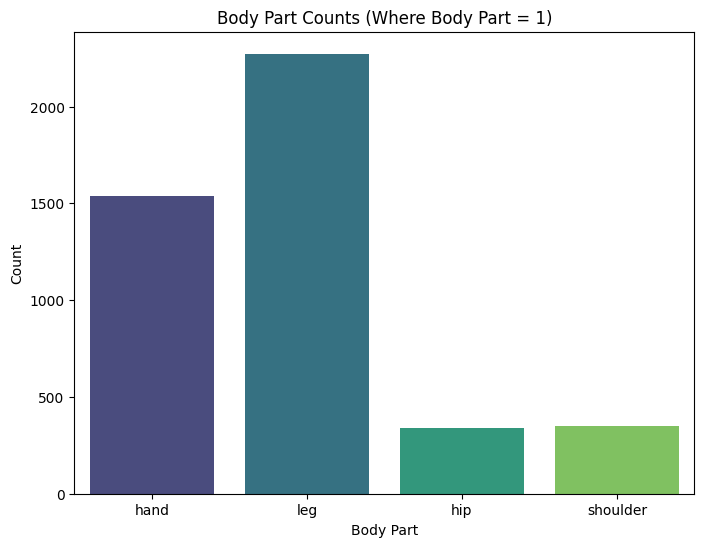

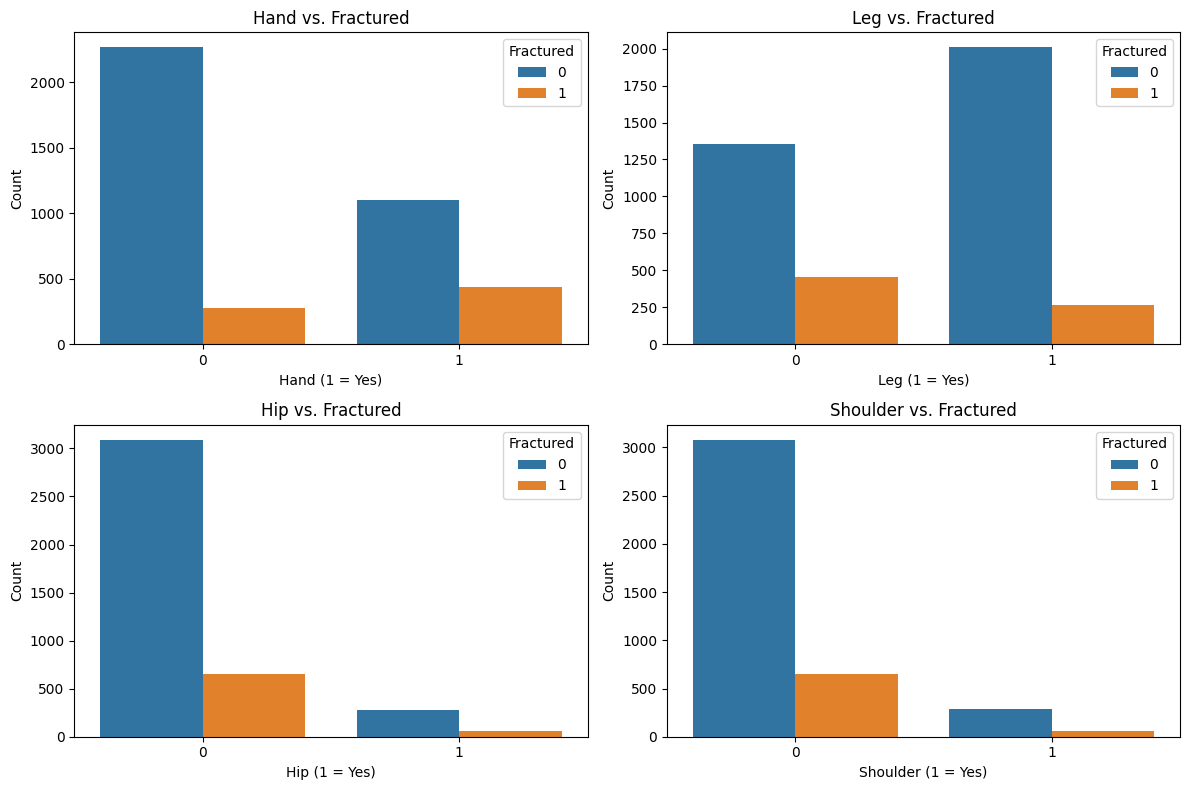

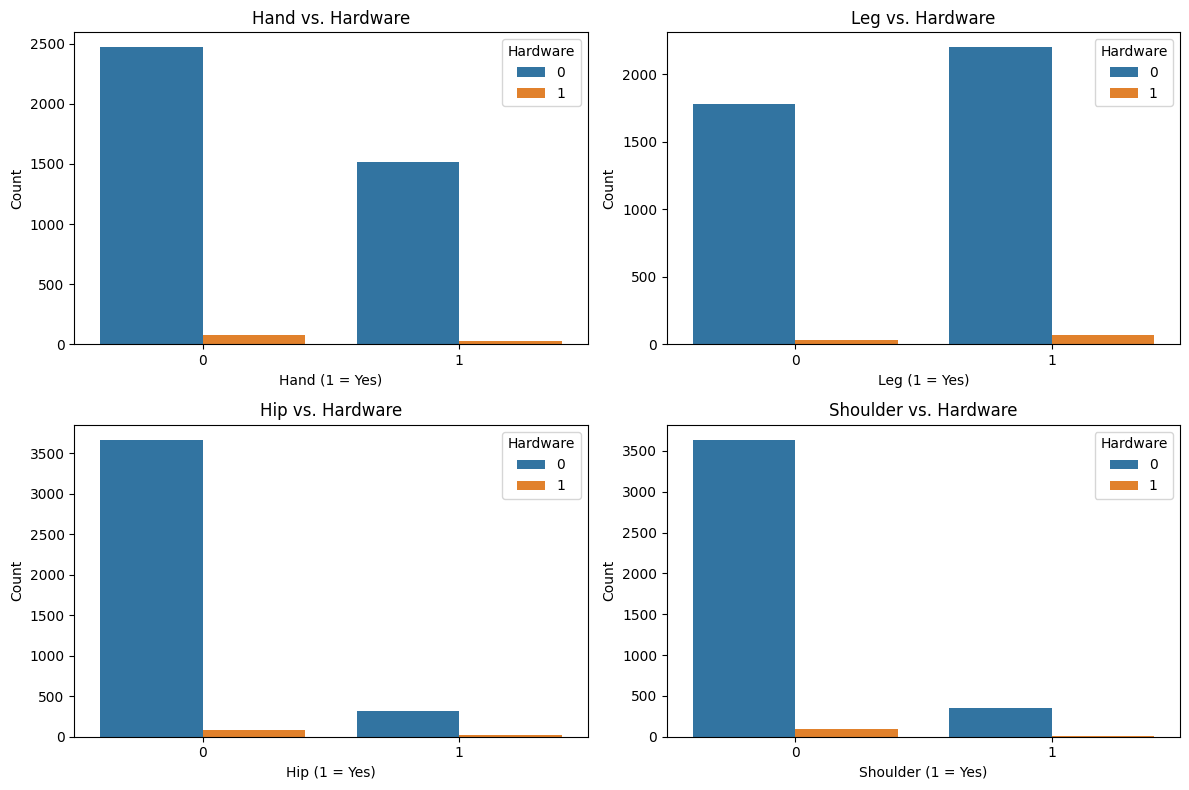

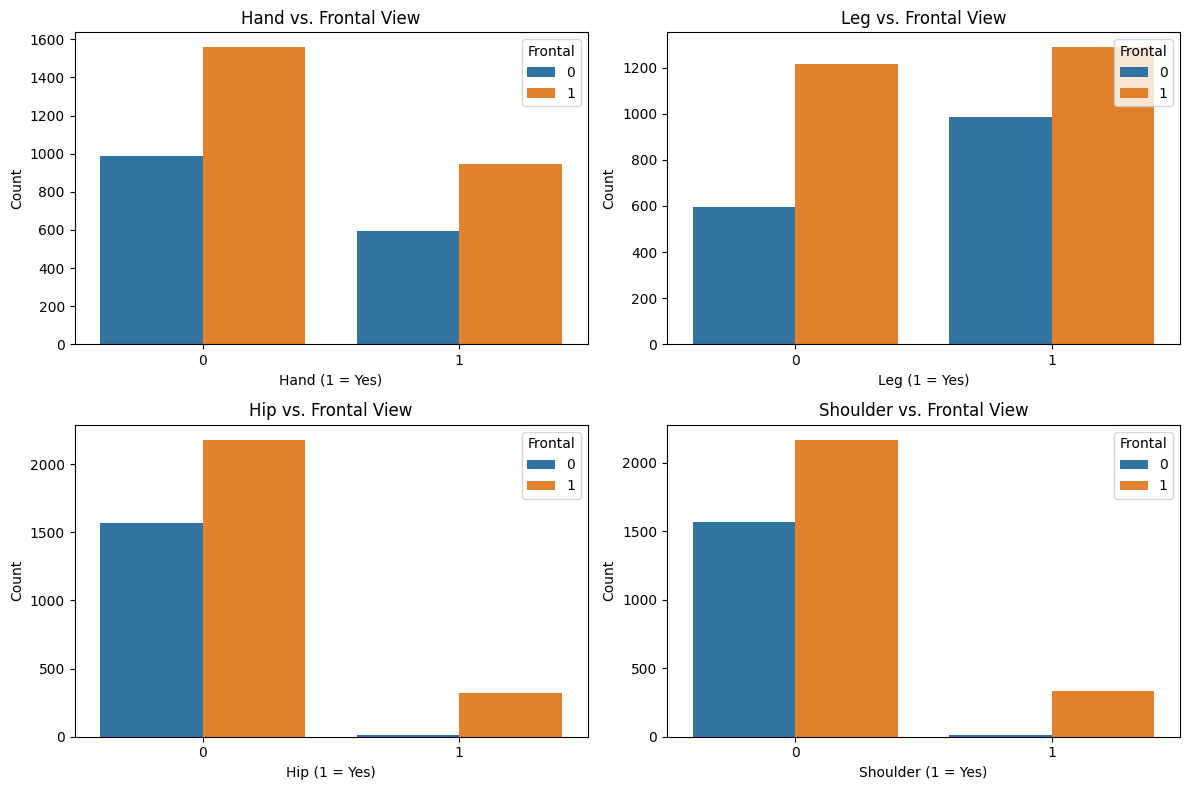

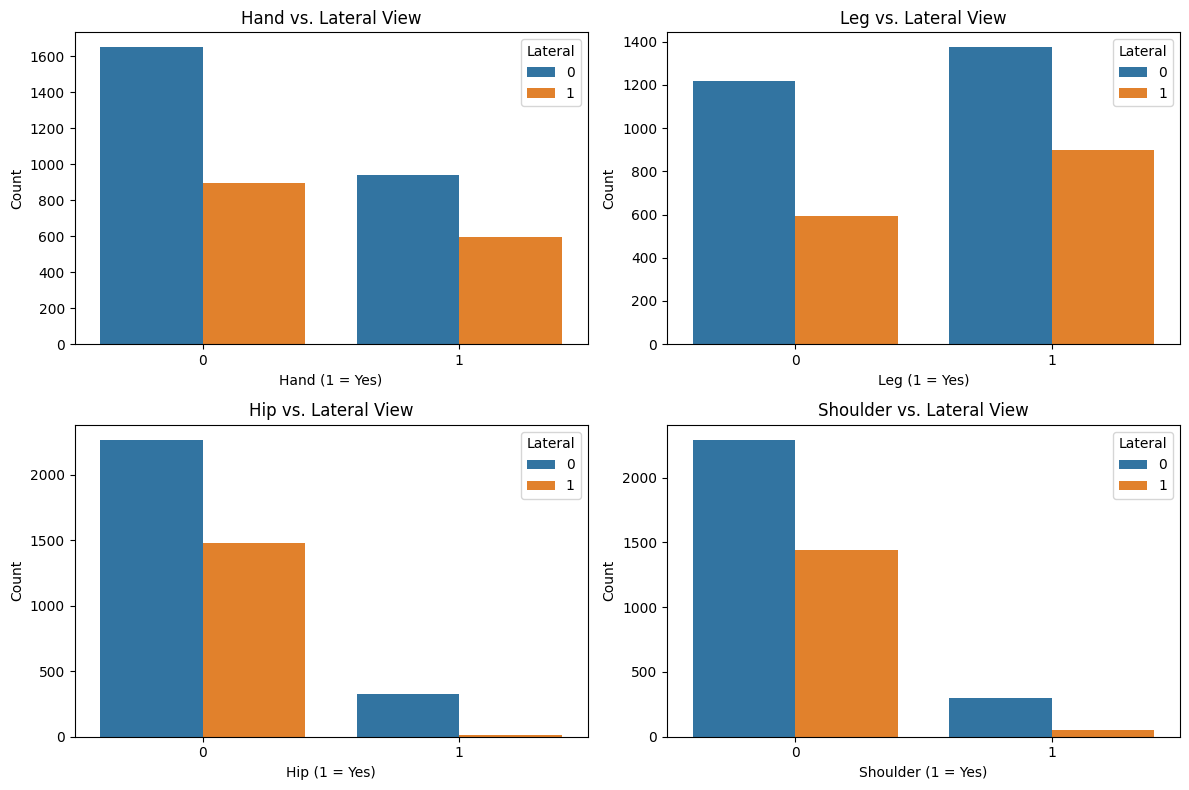

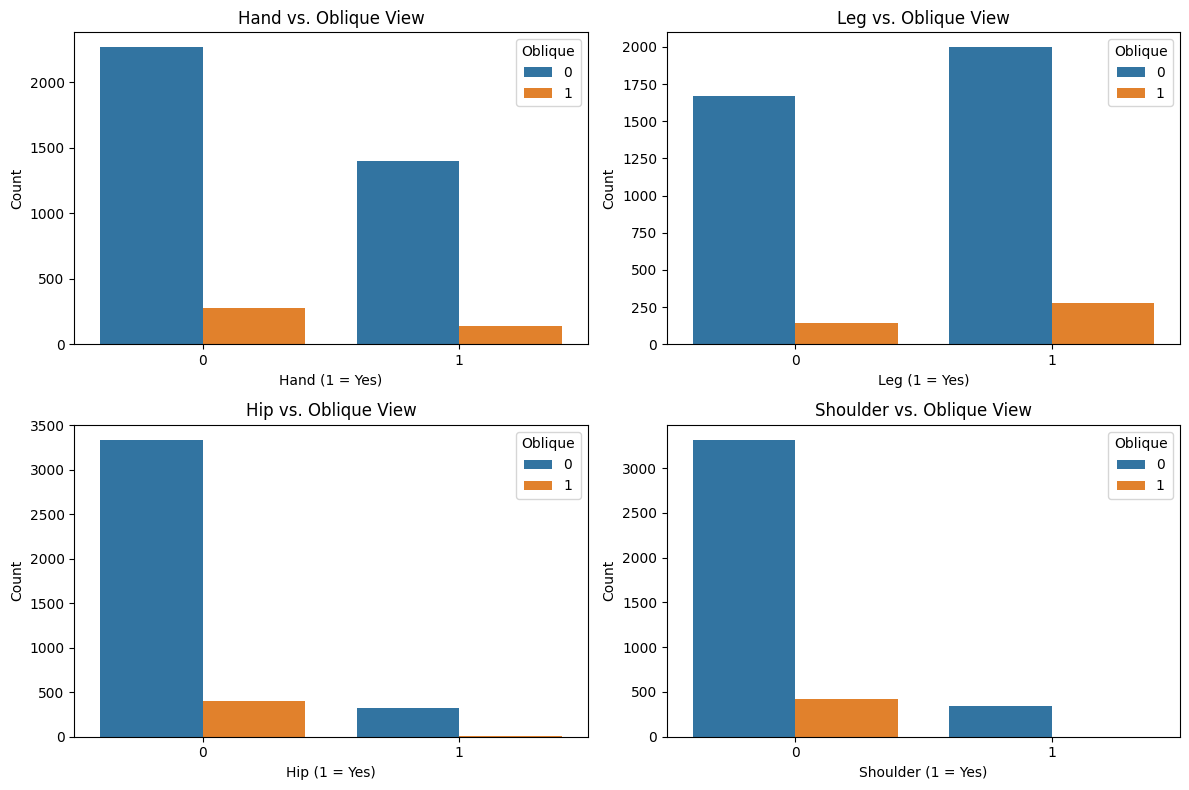

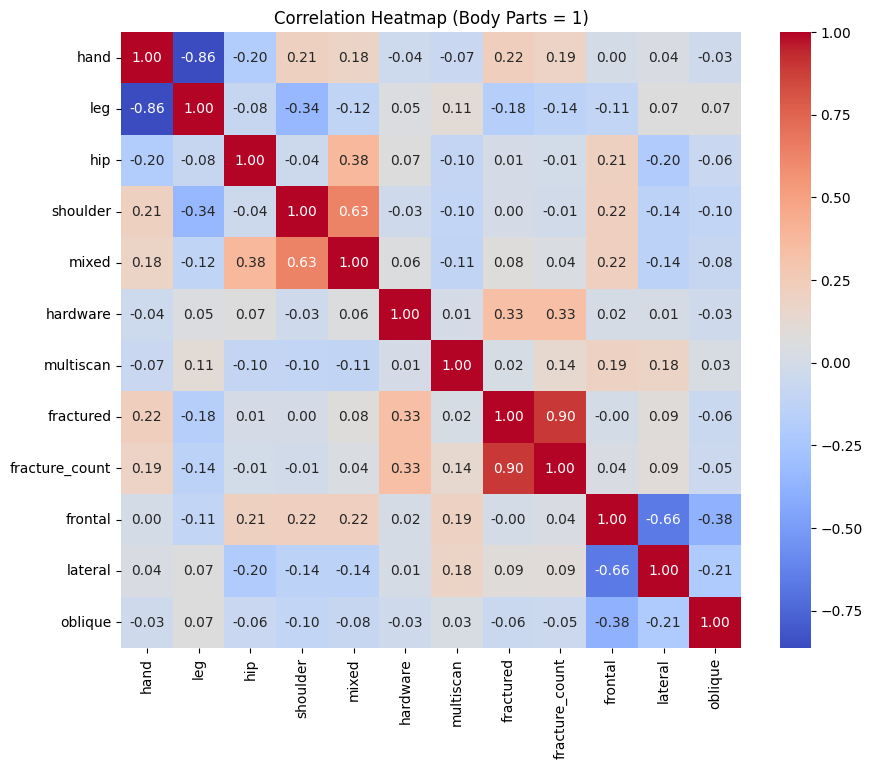

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/content/FracAtlas/dataset.csv')
print(df.head())
print(df.info())

print("\n--- FREQUENCIES OF EACH COLUMN  ---")
for col in df.columns:
    if df[col].dropna().isin([0,1]).all():
        pct_ones = 100 * df[col].sum() / len(df)
        print(f"{col}: {pct_ones:.2f}% of rows have 1")
    else:
        # For non-binary, we show value_counts normalized
        val_counts = df[col].value_counts(normalize=True) * 100
        print(f"\n{col} distribution (in %):")
        print(val_counts)
    print("-"*50)


body_part_cols = ['hand', 'leg', 'hip', 'shoulder']
filtered_df = df[(df[body_part_cols].sum(axis=1) > 0)]

# -----------------------------------------------------------------------------
# 1. DISTRIBUTION OF BODY PARTS WHERE BODY PART = 1
# -----------------------------------------------------------------------------
plt.figure(figsize=(8, 6))
sns.barplot(
    x=body_part_cols,
    y=[filtered_df[col].sum() for col in body_part_cols],
    palette='viridis'
)
plt.title('Body Part Counts (Where Body Part = 1)')
plt.xlabel('Body Part')
plt.ylabel('Count')
plt.show()

# -----------------------------------------------------------------------------
# 2. BODY PARTS VS. FRACTURED
# -----------------------------------------------------------------------------
plt.figure(figsize=(12, 8))
for i, bp_col in enumerate(body_part_cols, 1):
    ax = plt.subplot(2, 2, i)
    sns.countplot(x=bp_col, hue="fractured", data=filtered_df, ax=ax)
    ax.set_title(f"{bp_col.capitalize()} vs. Fractured")
    ax.set_xlabel(f"{bp_col.capitalize()} (1 = Yes)")
    ax.set_ylabel("Count")
    ax.legend(title="Fractured", loc="upper right")

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# 3. BODY PARTS VS. HARDWARE (Where Body Part = 1)
# -----------------------------------------------------------------------------
plt.figure(figsize=(12, 8))
for i, bp_col in enumerate(body_part_cols, 1):
    ax = plt.subplot(2, 2, i)
    sns.countplot(x=bp_col, hue="hardware", data=filtered_df, ax=ax)
    ax.set_title(f"{bp_col.capitalize()} vs. Hardware")
    ax.set_xlabel(f"{bp_col.capitalize()} (1 = Yes)")
    ax.set_ylabel("Count")
    ax.legend(title="Hardware", loc="upper right")

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# 4. BODY PARTS VS. SCAN VIEW (FRONTAL, LATERAL, OBLIQUE)
# -----------------------------------------------------------------------------
scan_views = ['frontal', 'lateral', 'oblique']

for scan_view in scan_views:
    plt.figure(figsize=(12, 8))
    for i, bp_col in enumerate(body_part_cols, 1):
        ax = plt.subplot(2, 2, i)
        sns.countplot(x=bp_col, hue=scan_view, data=filtered_df, ax=ax)
        ax.set_title(f"{bp_col.capitalize()} vs. {scan_view.capitalize()} View")
        ax.set_xlabel(f"{bp_col.capitalize()} (1 = Yes)")
        ax.set_ylabel("Count")
        ax.legend(title=scan_view.capitalize(), loc="upper right")

    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------------------------
# 5. CORRELATION HEATMAP (Only for Rows with Body Part = 1)
# -----------------------------------------------------------------------------

numeric_cols = filtered_df.select_dtypes(include='number').columns
corr_matrix = filtered_df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Body Parts = 1)')
plt.show()


In [ ]:
!pip install opencv-python

Total Images: 717



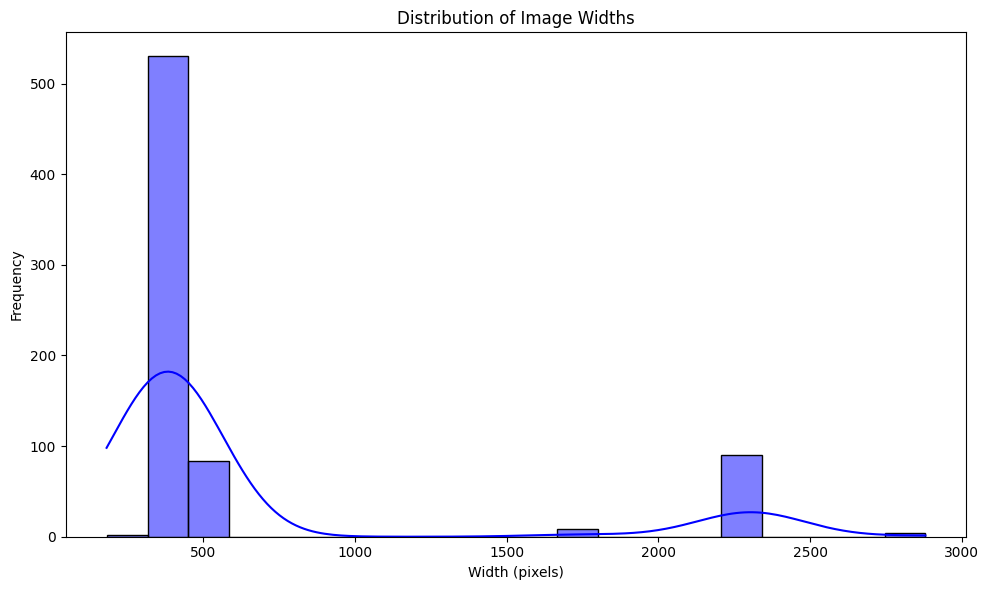

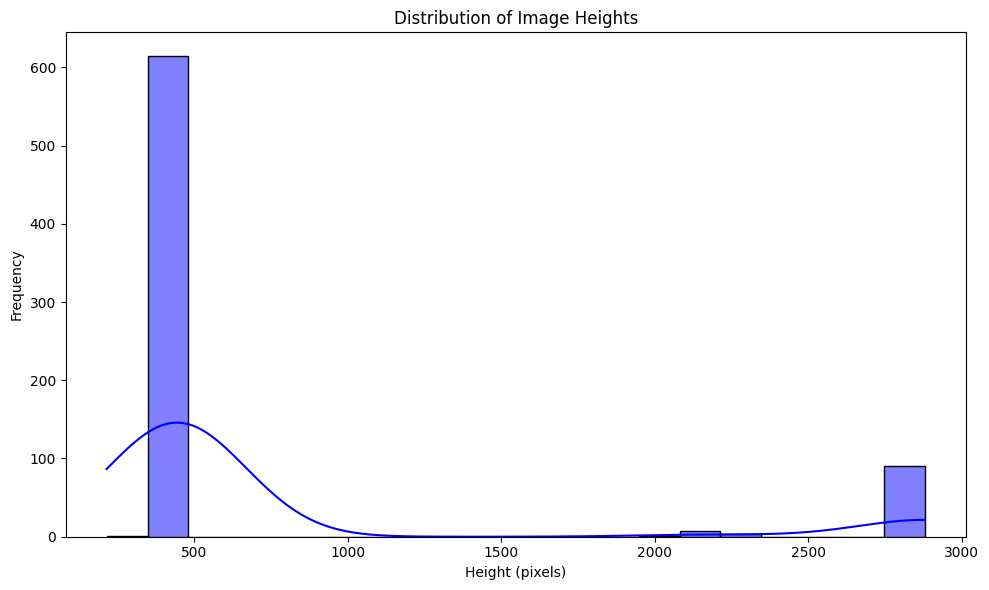

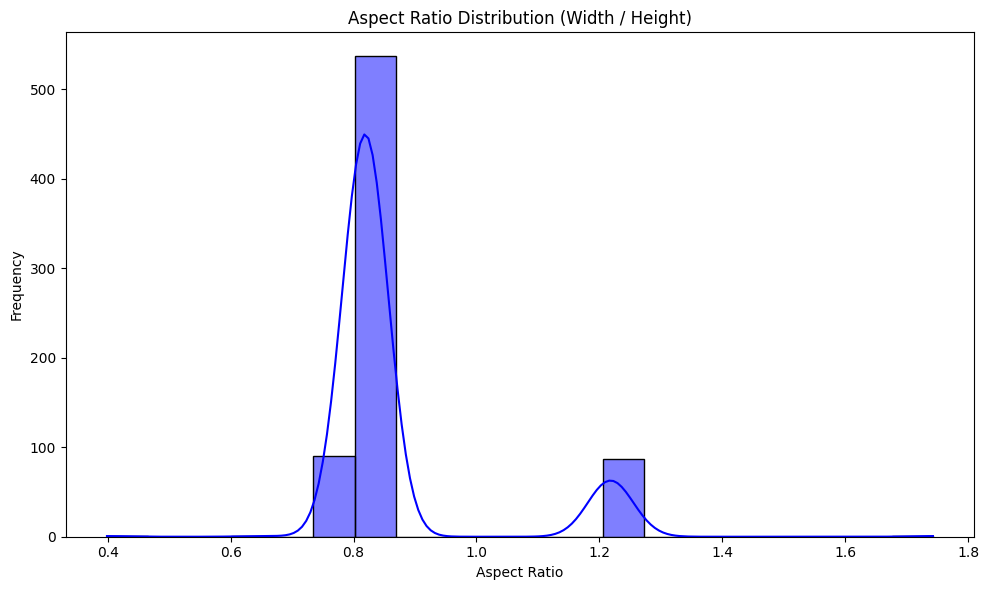

Top 10 Common Image Dimensions:
   width  height  count
3    373     454    529
7   2304    2880     90
4    454     373     83
6   1760    2140      7
8   2880    2304      4
0    181     454      1
2    373     214      1
1    296     454      1
5   1727    2049      1 

Total Annotations: 922



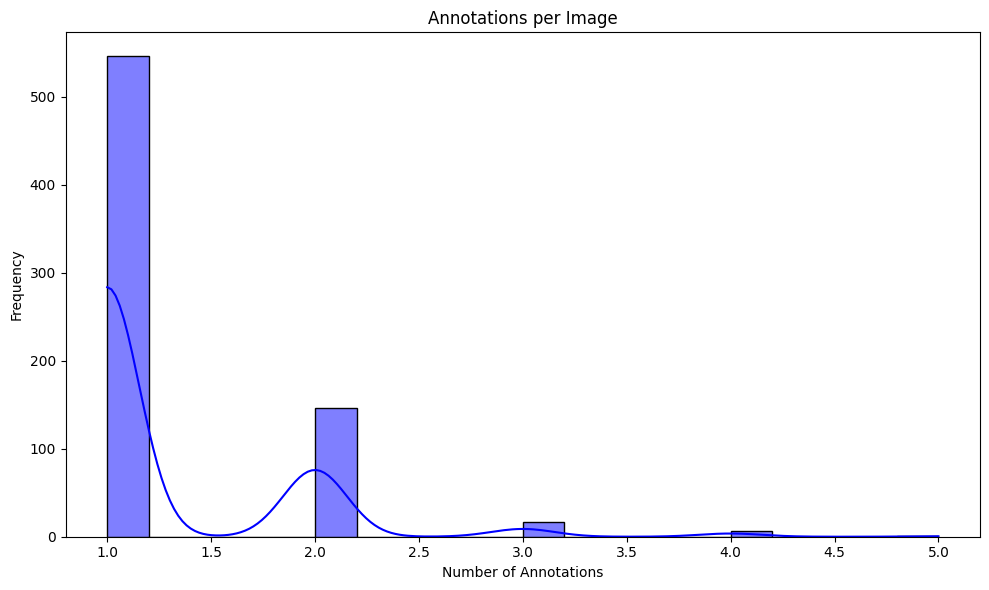

Out-of-bounds bounding boxes: 4


Visualizing 4 out-of-bounds bounding boxes...
Displaying OOB bounding boxes for Image ID: 199


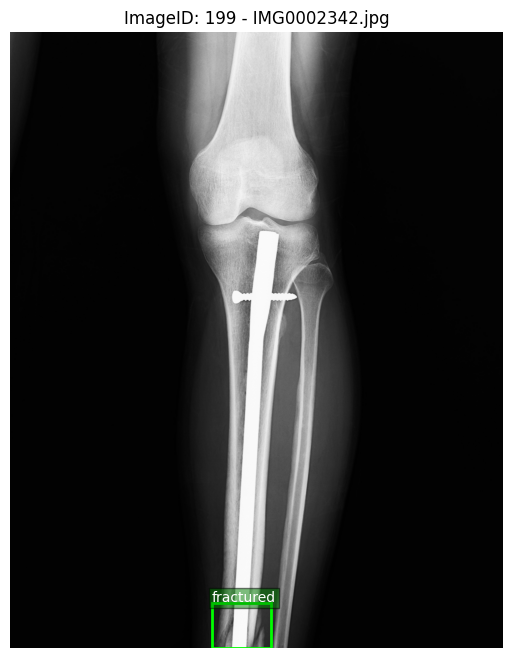

Displaying OOB bounding boxes for Image ID: 202


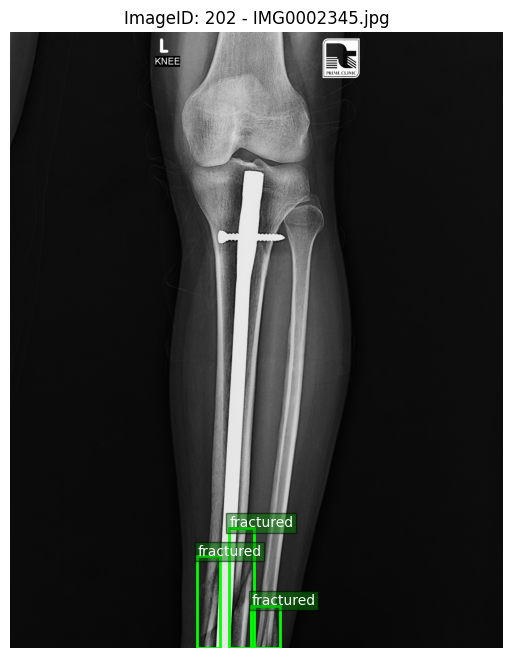

Displaying OOB bounding boxes for Image ID: 202


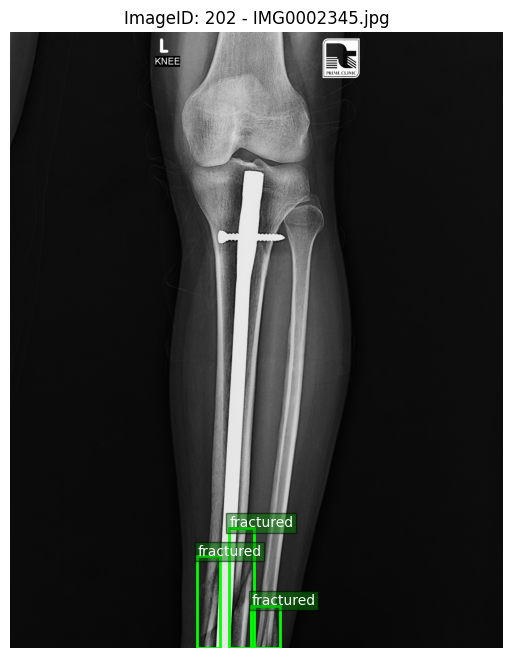

Displaying OOB bounding boxes for Image ID: 202


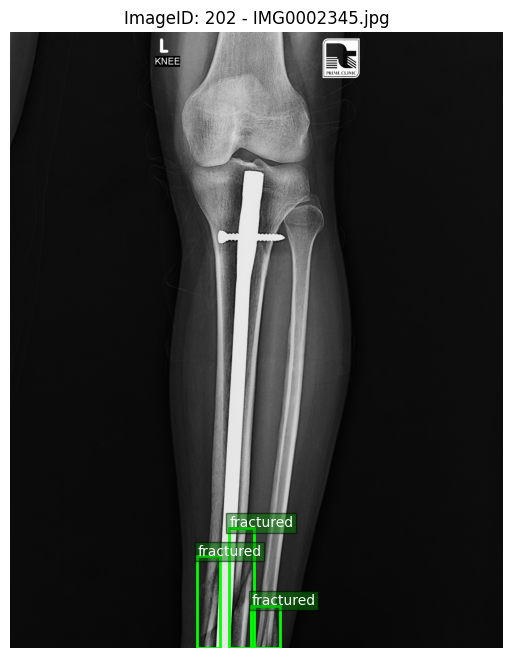


=== Showing the first 9 images with bounding boxes (if images exist) ===


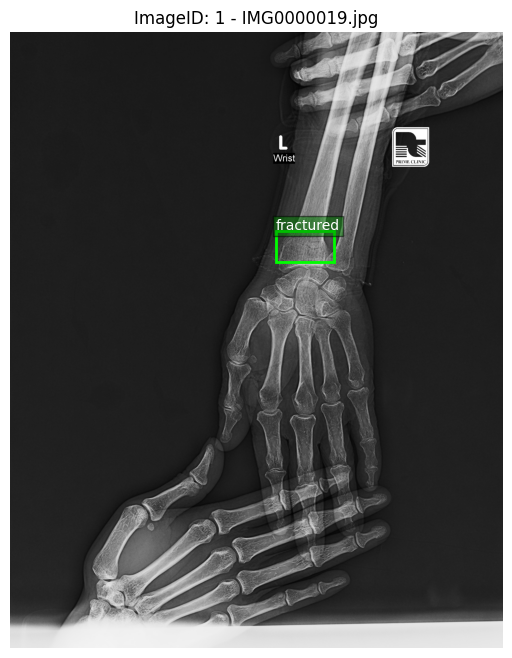

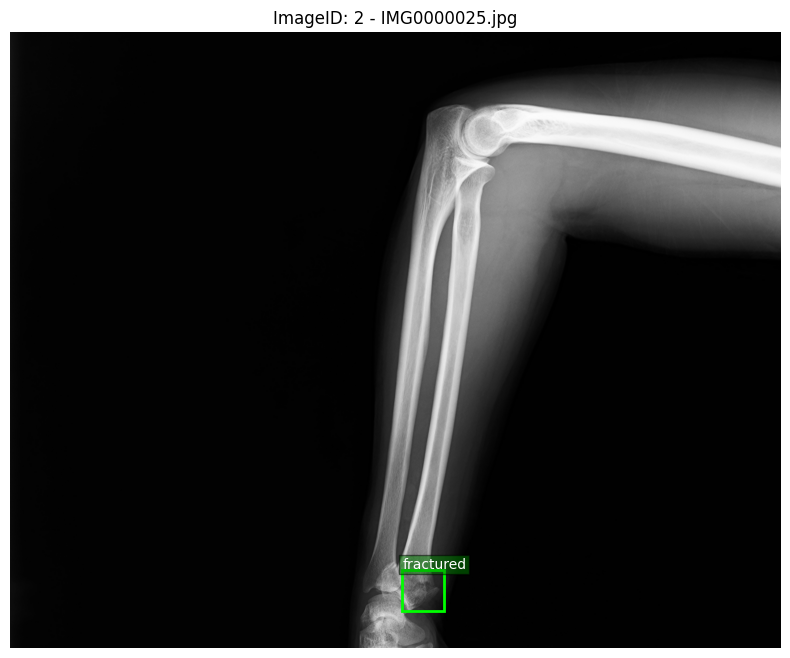

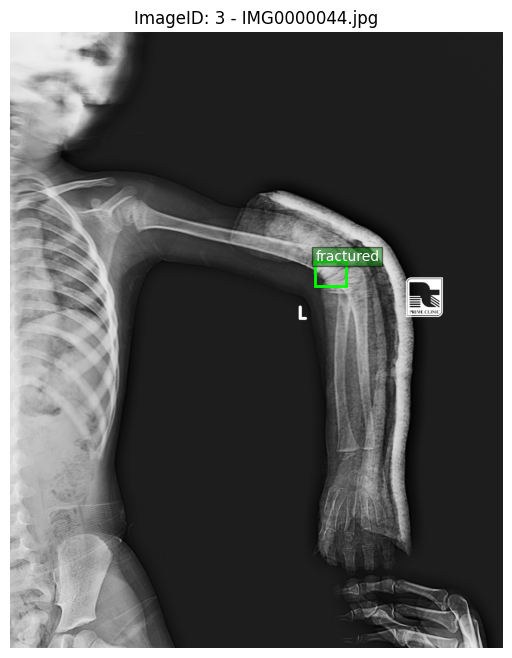

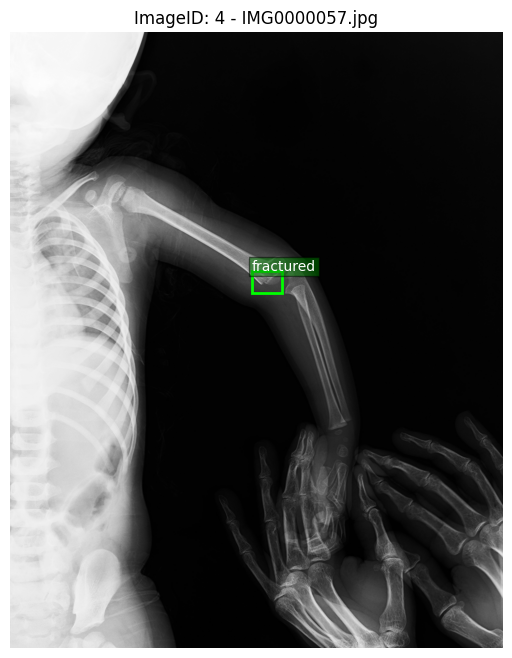

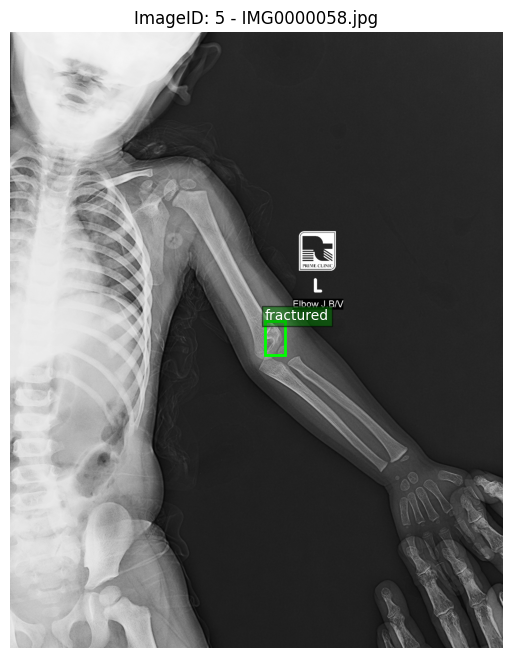

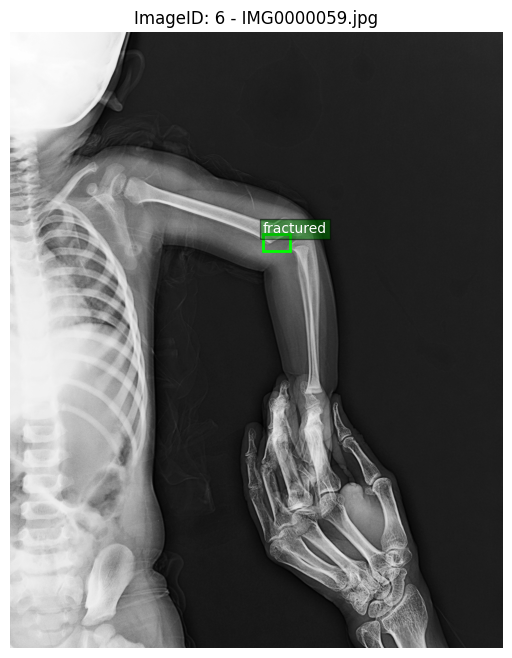

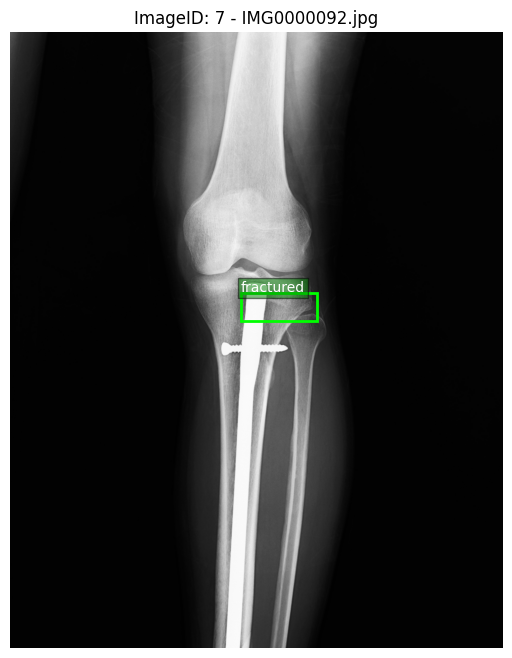

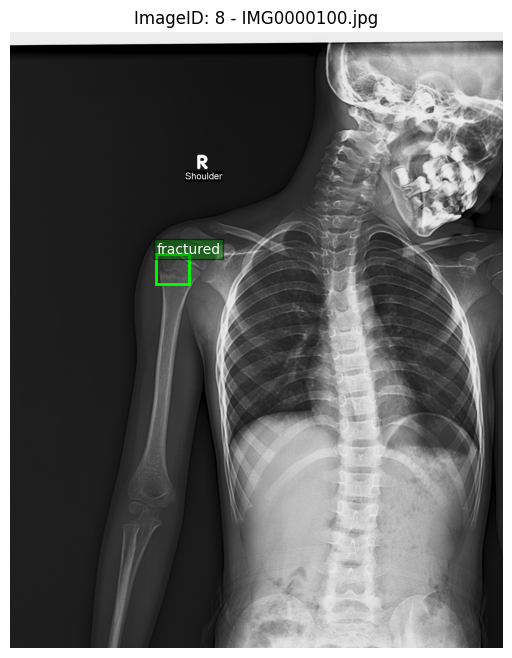

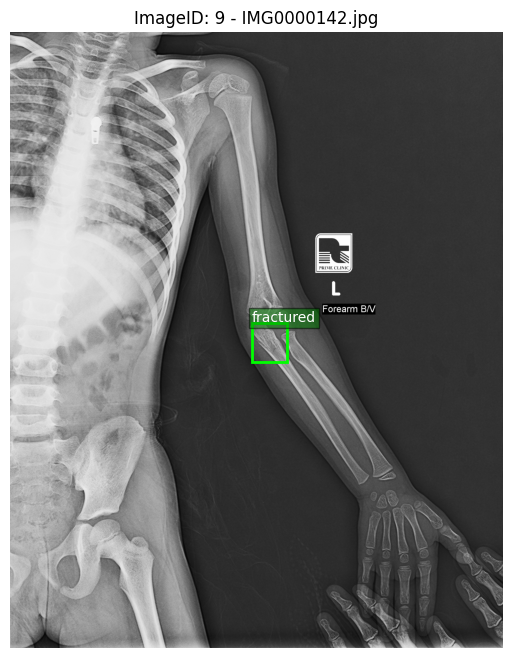


=== EDA Complete! ===
We've done:
 - Image dimension analysis
 - Annotation distributions (bounding box, area, aspect ratio)
 - Category distribution & co-occurrence
 - Displayed out-of-bound bounding boxes.


In [ ]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as patches
from collections import Counter
import cv2

# ---------------------------------------------------------------------
# 1. Load COCO JSON
# ---------------------------------------------------------------------
file_path = "/content/FracAtlas/Annotations/COCO JSON/COCO_fracture_masks.json"  # <-- Adjust path if needed
images_folder = "/content/FracAtlas/images/Fractured"
with open(file_path, "r") as file:
    coco_data = json.load(file)

images_df = pd.DataFrame(coco_data.get("images", []))
annotations_df = pd.DataFrame(coco_data.get("annotations", []))
categories_df = pd.DataFrame(coco_data.get("categories", []))

# ---------------------------------------------------------------------
# 2. Helper Functions
# ---------------------------------------------------------------------
def plot_histogram(data, column, title, xlabel, ylabel, bins=20):
    """
    Plots a histogram (with KDE) using Seaborn.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=bins, kde=True, color="blue")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

def plot_bar(x, y, title, xlabel, ylabel):
    """
    Plots a simple bar chart using Seaborn.
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x, y=y, color="blue")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

def show_image_with_bboxes_matplotlib(image_row, image_annotations, cat_id_to_name):
    """
    Displays an image inline (with bounding boxes) using Matplotlib.
    """
    img_id = image_row["id"]
    filename = image_row["file_name"]
    img_path = os.path.join(images_folder, filename)

    # Read image via OpenCV (BGR), then convert to RGB
    image = cv2.imread(img_path)
    if image is None:
        print(f"Warning: Could not load image: {img_path}")
        return
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.imshow(image)

    # Draw bounding boxes
    for _, ann_row in image_annotations.iterrows():
        x, y, w, h = ann_row["bbox"]
        rect = patches.Rectangle(
            (x, y), w, h, linewidth=2, edgecolor='lime', facecolor='none'
        )
        ax.add_patch(rect)

        cat_id = ann_row["category_id"]
        cat_name = cat_id_to_name.get(cat_id, str(cat_id))  # Fallback to ID if no name
        ax.text(
            x, y - 5,
            cat_name,
            fontsize=10, color='white',
            bbox=dict(facecolor='green', alpha=0.5, pad=2)
        )

    ax.set_title(f"ImageID: {img_id} - {filename}")
    plt.axis('off')
    plt.show()


# ---------------------------------------------------------------------
# 3. Image Data Analysis
# ---------------------------------------------------------------------
if not images_df.empty:
    print(f"Total Images: {len(images_df)}\n")

    # 3.1 Dimension Analysis
    plot_histogram(images_df, "width",
                   "Distribution of Image Widths",
                   "Width (pixels)",
                   "Frequency")

    plot_histogram(images_df, "height",
                   "Distribution of Image Heights",
                   "Height (pixels)",
                   "Frequency")

    # Aspect ratio (width / height)
    images_df["aspect_ratio"] = images_df["width"] / images_df["height"]
    plot_histogram(images_df, "aspect_ratio",
                   "Aspect Ratio Distribution (Width / Height)",
                   "Aspect Ratio",
                   "Frequency")

    # Top 10 most common dimensions
    dimension_counts = images_df.groupby(["width", "height"]).size().reset_index(name="count")
    dimension_counts_sorted = dimension_counts.sort_values("count", ascending=False).head(10)
    print("Top 10 Common Image Dimensions:")
    print(dimension_counts_sorted, "\n")
else:
    print("No image data found.\n")

# ---------------------------------------------------------------------
# 4. Annotations Analysis
# ---------------------------------------------------------------------
cat_id_to_name = {}  # Initialize as an empty dictionary

if not annotations_df.empty:
    print(f"Total Annotations: {len(annotations_df)}\n")

    # 4.1 Annotations per image
    annotation_counts = annotations_df["image_id"].value_counts().reset_index()
    annotation_counts.columns = ["image_id", "annotation_count"]
    plot_histogram(annotation_counts, "annotation_count",
                   "Annotations per Image",
                   "Number of Annotations",
                   "Frequency")

    # 4.2 Bounding Box Analysis
    if "bbox" in annotations_df.columns and len(annotations_df["bbox"]) > 0:
        bboxes = pd.DataFrame(annotations_df["bbox"].tolist(), columns=["x", "y", "bb_width", "bb_height"])
        annotations_df = pd.concat([annotations_df, bboxes], axis=1)

        # Compute area if not present
        if "area" not in annotations_df.columns:
            annotations_df["area"] = annotations_df["bb_width"] * annotations_df["bb_height"]

        # Out-of-bounds check
        if not images_df.empty and "width" in images_df.columns and "height" in images_df.columns:
            img_size_map = images_df.set_index("id")[["width", "height"]].to_dict("index")

            def out_of_bounds(row):
                img_id = row["image_id"]
                if img_id not in img_size_map:
                    return False
                img_w, img_h = img_size_map[img_id]["width"], img_size_map[img_id]["height"]
                x, y, w, h = row["x"], row["y"], row["bb_width"], row["bb_height"]
                if x < 0 or y < 0:
                    return True
                if (x + w) > img_w or (y + h) > img_h:
                    return True
                return False

            annotations_df["out_of_bounds"] = annotations_df.apply(out_of_bounds, axis=1)
            oob = annotations_df[annotations_df["out_of_bounds"] == True]
            print(f"Out-of-bounds bounding boxes: {len(oob)}\n")

    # 4.3 Category Analysis
    if not categories_df.empty:
        cat_id_to_name = dict(zip(categories_df["id"], categories_df["name"]))  # Populate category mapping

# ---------------------------------------------------------------------
# 5. Visualize Out-of-Bounds Bounding Boxes
# ---------------------------------------------------------------------
if not oob.empty:
    print(f"\nVisualizing {len(oob)} out-of-bounds bounding boxes...")

    for idx in range(min(9, len(oob))):  # Display up to 9 OOB images
        oob_row = oob.iloc[idx]
        image_id = oob_row["image_id"]

        # Locate the image metadata
        image_row = images_df[images_df["id"] == image_id]
        if not image_row.empty:
            image_row = image_row.iloc[0]
            # Extract all annotations for this image
            oob_annotations = oob[oob["image_id"] == image_id]

            print(f"Displaying OOB bounding boxes for Image ID: {image_id}")
            show_image_with_bboxes_matplotlib(image_row, oob_annotations, cat_id_to_name)
else:
    print("No out-of-bound bounding boxes found.\n")

print("\n=== Showing the first 9 images with bounding boxes (if images exist) ===")
for i in range(min(9, len(images_df))):
        image_row = images_df.iloc[i]
        image_id = image_row["id"]
        # Grab the annotations for this image
        subset = annotations_df[annotations_df["image_id"] == image_id]
        show_image_with_bboxes_matplotlib(image_row, subset, cat_id_to_name)

print("\n=== EDA Complete! ===")
print("We've done:")
print(" - Image dimension analysis")
print(" - Annotation distributions (bounding box, area, aspect ratio)")
print(" - Category distribution & co-occurrence")
print(" - Displayed out-of-bound bounding boxes.")


In [ ]:
#!/bin/bash
!kaggle datasets download jasonroggy/grazpedwri-dx

Dataset URL: https://www.kaggle.com/datasets/jasonroggy/grazpedwri-dx
License(s): CC0-1.0
100% 15.1G/15.1G [02:38<00:00, 166MB/s]
100% 15.1G/15.1G [02:38<00:00, 103MB/s]


In [ ]:
!unzip grazpedwri-dx.zip

Streaming output truncated to the last 5000 lines.
  inflating: images_part4/4584_1095189599_01_WRI-R2_M007.png  
  inflating: images_part4/4584_1151264641_02_WRI-R1_M009.png  
  inflating: images_part4/4584_1151264682_02_WRI-R2_M009.png  
  inflating: images_part4/4585_0910481351_01_WRI-R1_F015.png  
  inflating: images_part4/4585_0910481388_01_WRI-R2_F015.png  
  inflating: images_part4/4586_0884855982_01_WRI-L1_F015.png  
  inflating: images_part4/4586_0884856014_02_WRI-L2_F015.png  
  inflating: images_part4/4587_0374311741_01_WRI-L1_M010.png  
  inflating: images_part4/4587_0374311805_01_WRI-L2_M010.png  
  inflating: images_part4/4587_0374883247_02_WRI-L1_M010.png  
  inflating: images_part4/4587_0374883292_02_WRI-L2_M010.png  
  inflating: images_part4/4587_0376004535_03_WRI-L1_M010.png  
  inflating: images_part4/4587_0376004566_03_WRI-L2_M010.png  
  inflating: images_part4/4588_1034162079_01_WRI-L1_F000.png  
  inflating: images_part4/4588_1034162125_01_WRI-L2_F000.png  
  in

Total images found: 20327


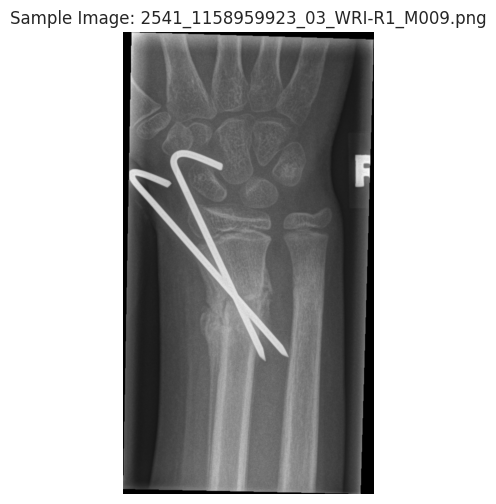

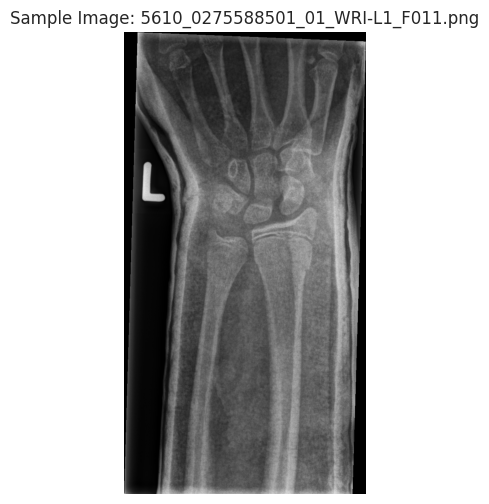

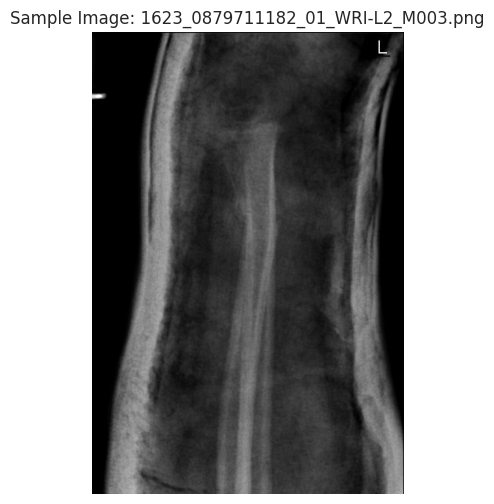

Resolution Statistics:
  Min Width: 316, Max Width: 947, Avg Width: 568.44
  Min Height: 656, Max Height: 1608, Avg Height: 1071.98


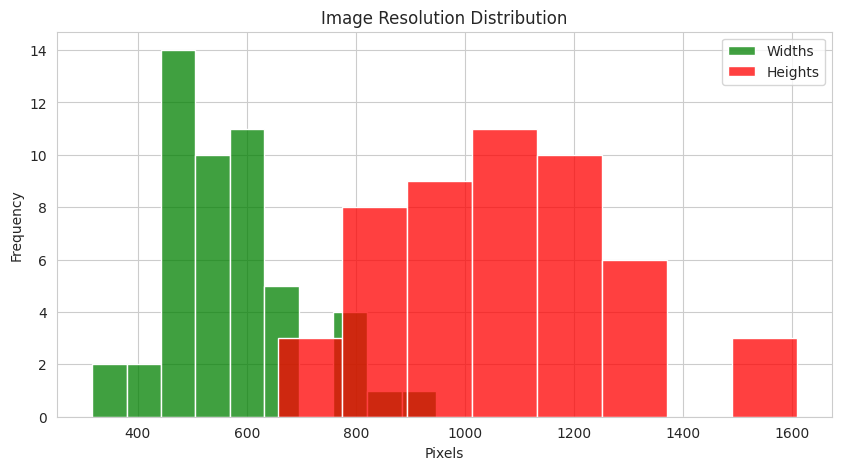

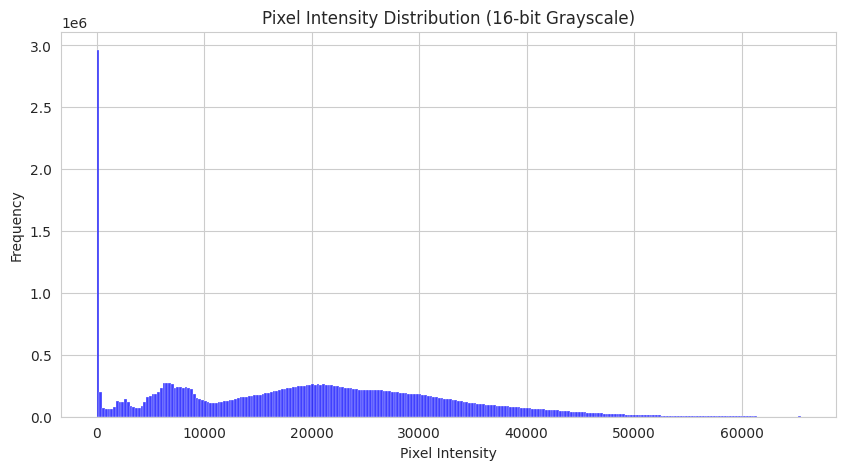

Metadata Overview:
                         filestem  patient_id  study_number    timehash  \
0  0001_1297860395_01_WRI-L1_M014           1             1  1297860395   
1  0001_1297860435_01_WRI-L2_M014           1             1  1297860435   
2  0002_0354485735_01_WRI-R1_F012           2             1   354485735   
3  0002_0354485759_01_WRI-R2_F012           2             1   354485759   
4  0003_0662359226_01_WRI-R1_M011           3             1   662359226   

  gender   age laterality  projection  initial_exam ao_classification  cast  \
0      M  14.1          L           1           1.0         23r-M/2.1   NaN   
1      M  14.1          L           2           1.0         23r-M/2.1   NaN   
2      F  12.0          R           1           1.0         23r-M/2.1   NaN   
3      F  12.0          R           2           1.0         23r-M/2.1   NaN   
4      M  11.1          R           1           1.0          23-M/3.1   NaN   

   diagnosis_uncertain  osteopenia  fracture_visible  m

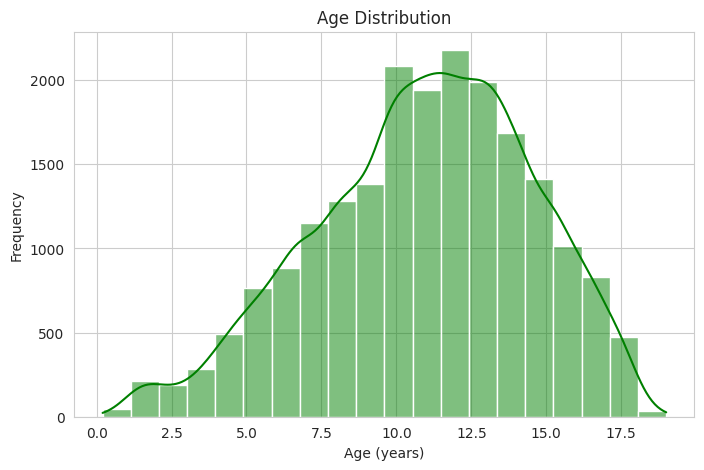

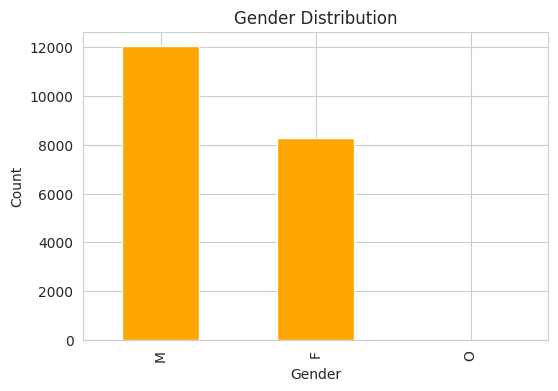

PASCAL VOC Annotation Files: 20327


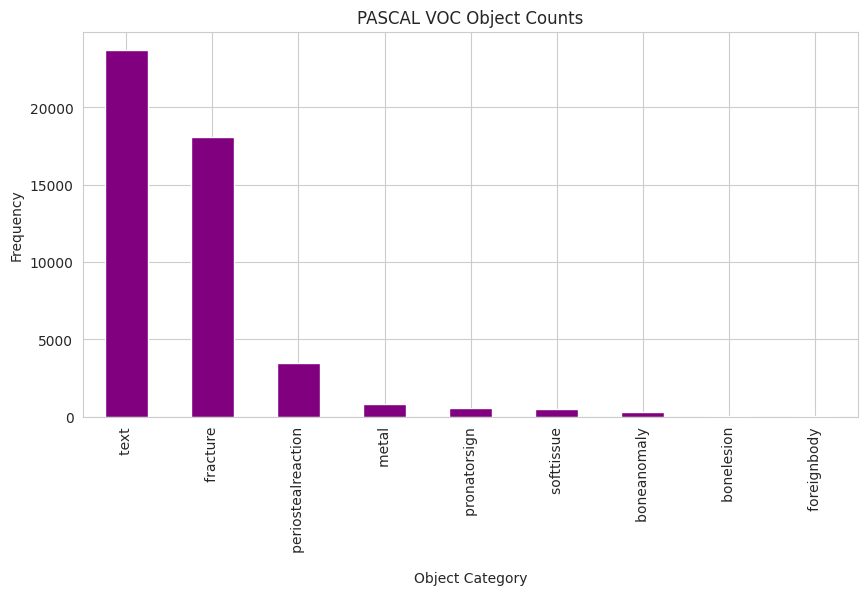

YOLOv5 Annotation Files: 0
Supervisely Annotation Files: 1


In [ ]:
import os
import gc
import random
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import json

# Settings
sns.set_style("whitegrid")
plt.rcParams["figure.dpi"] = 100

# Directories
image_dirs = ["/content/images_part1", "/content/images_part2", "/content/images_part3", "/content/images_part4"]
pascalvoc_dir = "/content/folder_structure/pascalvoc"
yolov5_dir = "/content/folder_structure/yolov5"
supervisely_dir = "/content/folder_structure/supervisely"
metadata_file = "/content/dataset.csv"

# Helper Function to Get Image Files
def get_image_files(dirs):
    """Collect all image files from the specified directories."""
    image_files = []
    for dir_path in dirs:
        if not os.path.exists(dir_path):
            print(f"Warning: Directory {dir_path} does not exist!")
            continue
        files = [os.path.join(dir_path, f) for f in os.listdir(dir_path) if f.lower().endswith('.png')]
        image_files.extend(files)
    return image_files

# Analyze Images
def analyze_images(image_dirs):
    """Analyze image properties like resolution, color mode, and pixel intensity distribution."""
    image_files = get_image_files(image_dirs)
    print(f"Total images found: {len(image_files)}")

    # Display random samples
    sample_images = random.sample(image_files, min(3, len(image_files)))
    for img_path in sample_images:
        img = Image.open(img_path)
        plt.figure(figsize=(6, 6))
        plt.imshow(img, cmap='gray')
        plt.title(f"Sample Image: {os.path.basename(img_path)}")
        plt.axis('off')
        plt.show()

    # Analyze resolutions and pixel intensities
    widths, heights, intensities = [], [], []
    for img_path in image_files[:50]:  # Limit to first 50 images for memory efficiency
        img = Image.open(img_path)
        widths.append(img.width)
        heights.append(img.height)
        intensities.extend(np.array(img).flatten())

    # Resolution statistics
    print("Resolution Statistics:")
    print(f"  Min Width: {min(widths)}, Max Width: {max(widths)}, Avg Width: {np.mean(widths):.2f}")
    print(f"  Min Height: {min(heights)}, Max Height: {max(heights)}, Avg Height: {np.mean(heights):.2f}")

    # Resolution distribution
    plt.figure(figsize=(10, 5))
    sns.histplot(widths, kde=False, color='green', label='Widths')
    sns.histplot(heights, kde=False, color='red', label='Heights')
    plt.title("Image Resolution Distribution")
    plt.xlabel("Pixels")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    # Pixel intensity distribution
    plt.figure(figsize=(10, 5))
    sns.histplot(intensities, bins=256, kde=False, color='blue')
    plt.title("Pixel Intensity Distribution (16-bit Grayscale)")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Analyze Metadata
def analyze_metadata(metadata_file):
    """Analyze metadata like age, sex, and other demographic information."""
    if not os.path.exists(metadata_file):
        print(f"Metadata file {metadata_file} not found!")
        return

    metadata = pd.read_csv(metadata_file)
    print("Metadata Overview:")
    print(metadata.head())

    # Age distribution
    plt.figure(figsize=(8, 5))
    sns.histplot(metadata['age'], bins=20, kde=True, color='green')
    plt.title("Age Distribution")
    plt.xlabel("Age (years)")
    plt.ylabel("Frequency")
    plt.show()

    # Sex distribution
    plt.figure(figsize=(6, 4))
    metadata['gender'].value_counts().plot(kind='bar', color='orange')
    plt.title("Gender Distribution")
    plt.xlabel("Gender")
    plt.ylabel("Count")
    plt.show()

# Parse Annotations
def parse_pascalvoc_annotations(pascalvoc_dir):
    """Parse object counts from PASCAL VOC XML annotations."""
    if not os.path.exists(pascalvoc_dir):
        print(f"PASCAL VOC directory {pascalvoc_dir} not found!")
        return {}

    annotation_files = [os.path.join(pascalvoc_dir, f) for f in os.listdir(pascalvoc_dir) if f.endswith('.xml')]
    print(f"PASCAL VOC Annotation Files: {len(annotation_files)}")

    object_counts = {}
    for file in annotation_files:
        tree = ET.parse(file)
        root = tree.getroot()
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            object_counts[obj_name] = object_counts.get(obj_name, 0) + 1

    return object_counts

def parse_yolov5_annotations(yolov5_dir):
    """Parse object counts from YOLOv5 text annotations."""
    if not os.path.exists(yolov5_dir):
        print(f"YOLOv5 directory {yolov5_dir} not found!")
        return {}

    annotation_files = [os.path.join(yolov5_dir, f) for f in os.listdir(yolov5_dir) if f.endswith('.txt')]
    print(f"YOLOv5 Annotation Files: {len(annotation_files)}")

    object_counts = {}
    for file in annotation_files:
        with open(file, 'r') as f:
            for line in f:
                label = line.split()[0]
                object_counts[label] = object_counts.get(label, 0) + 1

    return object_counts

def parse_supervisely_annotations(supervisely_dir):
    """Parse object counts from Supervisely JSON annotations."""
    if not os.path.exists(supervisely_dir):
        print(f"Supervisely directory {supervisely_dir} not found!")
        return {}

    annotation_files = [os.path.join(supervisely_dir, f) for f in os.listdir(supervisely_dir) if f.endswith('.json')]
    print(f"Supervisely Annotation Files: {len(annotation_files)}")

    object_counts = {}
    for file_path in annotation_files:
        with open(file_path, 'r') as f:
            data = json.load(f)
            if "objects" in data:
                for obj in data["objects"]:
                    class_name = obj.get("classTitle", "unknown")
                    object_counts[class_name] = object_counts.get(class_name, 0) + 1

    return object_counts

# Visualize Annotation Counts
def visualize_annotations(counts, title):
    """Visualize annotation counts as a bar chart."""
    plt.figure(figsize=(10, 5))
    pd.Series(counts).sort_values(ascending=False).plot(kind='bar', color='purple')
    plt.title(title)
    plt.xlabel("Object Category")
    plt.ylabel("Frequency")
    plt.show()

# Main Function
def main():
    # Step 1: Analyze Images
    analyze_images(image_dirs)

    # Step 2: Analyze Metadata
    analyze_metadata(metadata_file)

    # Step 3: Analyze PASCAL VOC Annotations
    pascal_counts = parse_pascalvoc_annotations(pascalvoc_dir)
    if pascal_counts:
        visualize_annotations(pascal_counts, "PASCAL VOC Object Counts")

    # Step 4: Analyze YOLOv5 Annotations
    yolov5_counts = parse_yolov5_annotations(yolov5_dir)
    if yolov5_counts:
        visualize_annotations(yolov5_counts, "YOLOv5 Object Counts")

    # Step 5: Analyze Supervisely Annotations
    supervisely_counts = parse_supervisely_annotations(supervisely_dir)
    if supervisely_counts:
        visualize_annotations(supervisely_counts, "Supervisely Object Counts")

if __name__ == "__main__":
    main()


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.1/910.1 kB 25.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import cv2
from google.colab.patches import cv2_imshow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 136MB/s]


In [ ]:
from ultralytics import YOLO


model = YOLO("yolov8n.pt")


model.train(
    data=os.path.join(BASE_DIR, "/content/FracAtlas/dataset.yaml"),
    epochs=50,                                    # Number of epochs
    imgsz=640,                                    # Image size
    batch=16,                                     # Batch size
    name="fracatlas_yolov8"                       # Experiment name
)

print("Training completed!")


Ultralytics 8.3.62 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/FracAtlas/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=fracatlas_yolov8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

100%|██████████| 755k/755k [00:00<00:00, 26.5MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 95.2MB/s]


AMP: checks passed ✅


train: Scanning /content/FracAtlas/labels/train... 3217 images, 0 backgrounds, 49 corrupt: 100%|██████████| 3266/3266 [00:01<00:00, 2266.69it/s]

train: WARNING ⚠️ /content/FracAtlas/images/train/IMG0004027.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/FracAtlas/images/train/IMG0004028.jpg: ignoring corrupt image/label: image file is truncated (20 bytes not processed)
train: WARNING ⚠️ /content/FracAtlas/images/train/IMG0004029.jpg: ignoring corrupt image/label: image file is truncated (22 bytes not processed)
train: WARNING ⚠️ /content/FracAtlas/images/train/IMG0004036.jpg: ignoring corrupt image/label: image file is truncated (14 bytes not processed)
train: WARNING ⚠️ /content/FracAtlas/images/train/IMG0004062.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /content/FracAtlas/images/train/IMG0004070.jpg: ignoring corrupt image/label: image file is truncated (41 bytes not processed)
train: WARNING ⚠️ /content/FracAtlas/images/train/IMG0004073.jpg: ignoring corrupt image/label: image file is truncated (3 bytes not processed)
train: WARNING ⚠️ /content/FracAtlas/images/train/IMG0004076.jpg: ignoring corru

train: New cache created: /content/FracAtlas/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/FracAtlas/labels/val... 807 images, 0 backgrounds, 10 corrupt: 100%|██████████| 817/817 [00:00<00:00, 1411.48it/s]

val: WARNING ⚠️ /content/FracAtlas/images/val/IMG0004075.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/FracAtlas/images/val/IMG0004092.jpg: ignoring corrupt image/label: image file is truncated (3 bytes not processed)
val: WARNING ⚠️ /content/FracAtlas/images/val/IMG0004094.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/FracAtlas/images/val/IMG0004122.jpg: ignoring corrupt image/label: image file is truncated (26 bytes not processed)
val: WARNING ⚠️ /content/FracAtlas/images/val/IMG0004123.jpg: ignoring corrupt image/label: image file is truncated (17 bytes not processed)
val: WARNING ⚠️ /content/FracAtlas/images/val/IMG0004143.jpg: ignoring corrupt image/label: image file is truncated (10 bytes not processed)
val: WARNING ⚠️ /content/FracAtlas/images/val/IMG0004149.jpg: ignoring corrupt image/label: image file is truncated (33 bytes not processed)
val: WARNING ⚠️ /content/FracAtlas/images/val/IMG0004155.jpg: ignoring corrupt image/label: image file is tr

val: New cache created: /content/FracAtlas/labels/val.cache
Plotting labels to runs/detect/fracatlas_yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/fracatlas_yolov8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       2.3G     0.2638      1.282      1.004          4        640: 100%|██████████| 202/202 [01:23<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.00it/s]


                   all        807        807      0.587      0.746      0.673      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.19G     0.1896     0.7727     0.9332          4        640: 100%|██████████| 202/202 [01:18<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.18it/s]


                   all        807        807       0.57      0.658       0.64      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.19G     0.1867      0.684     0.9369          4        640: 100%|██████████| 202/202 [01:17<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.17it/s]

                   all        807        807      0.616      0.784      0.705      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.18G     0.1739     0.6362     0.9314          4        640: 100%|██████████| 202/202 [01:20<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.03it/s]

                   all        807        807      0.672      0.783      0.735      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.19G     0.1601     0.6021     0.9252          2        640: 100%|██████████| 202/202 [01:18<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.01it/s]

                   all        807        807      0.735       0.75      0.771      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.18G     0.1373     0.5809     0.9112          4        640: 100%|██████████| 202/202 [01:17<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.07it/s]

                   all        807        807      0.688      0.706      0.755      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.18G      0.136      0.566     0.9088          2        640: 100%|██████████| 202/202 [01:18<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.29it/s]

                   all        807        807      0.693      0.765      0.765      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.18G     0.1171     0.5518     0.8991          2        640: 100%|██████████| 202/202 [01:20<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.47it/s]

                   all        807        807       0.61      0.712      0.717      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.18G      0.117     0.5421     0.9005          4        640: 100%|██████████| 202/202 [01:20<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.79it/s]

                   all        807        807      0.717      0.732      0.744      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.18G     0.1133     0.5343     0.8996          4        640: 100%|██████████| 202/202 [01:21<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.88it/s]

                   all        807        807      0.735       0.69      0.768       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.18G      0.106      0.527     0.8972          2        640: 100%|██████████| 202/202 [01:19<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.68it/s]


                   all        807        807      0.698      0.752      0.781      0.775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.18G     0.1018     0.5207     0.8932          2        640: 100%|██████████| 202/202 [01:19<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.44it/s]

                   all        807        807      0.737      0.738      0.774      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.18G    0.09962      0.503     0.8991          4        640: 100%|██████████| 202/202 [01:17<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.49it/s]


                   all        807        807      0.756      0.767      0.824      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.18G    0.09916     0.4977     0.8972          1        640: 100%|██████████| 202/202 [01:17<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]

                   all        807        807      0.575      0.911      0.771      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.18G    0.09144     0.4903     0.8954          3        640: 100%|██████████| 202/202 [01:17<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.24it/s]

                   all        807        807      0.859      0.738       0.82      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.18G    0.08879     0.4714     0.8872          2        640: 100%|██████████| 202/202 [01:18<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.16it/s]

                   all        807        807      0.722      0.735      0.768      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.18G    0.08873     0.4734     0.8913          4        640: 100%|██████████| 202/202 [01:18<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.05it/s]

                   all        807        807      0.749      0.821       0.82      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.18G    0.08523     0.4669      0.886          4        640: 100%|██████████| 202/202 [01:17<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.11it/s]

                   all        807        807      0.746      0.796      0.831      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.18G    0.08953     0.4736     0.9012          2        640: 100%|██████████| 202/202 [01:19<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.22it/s]

                   all        807        807      0.774      0.779      0.827      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.18G    0.09468     0.4717     0.9123          1        640: 100%|██████████| 202/202 [01:24<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.57it/s]


                   all        807        807      0.799      0.772      0.844      0.841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.18G    0.07712     0.4645     0.8892          2        640: 100%|██████████| 202/202 [01:23<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.11it/s]

                   all        807        807      0.796      0.782      0.833       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.18G    0.07773     0.4523     0.8844          4        640: 100%|██████████| 202/202 [01:21<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.27it/s]

                   all        807        807      0.802      0.815      0.859      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.18G    0.07403      0.463     0.8837          1        640: 100%|██████████| 202/202 [01:21<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.57it/s]

                   all        807        807      0.837       0.78      0.846      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.18G    0.07163     0.4354     0.8939          2        640: 100%|██████████| 202/202 [01:19<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.83it/s]

                   all        807        807      0.784      0.775       0.83      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.18G    0.08136     0.4533     0.9059          1        640: 100%|██████████| 202/202 [01:21<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.79it/s]

                   all        807        807       0.82      0.804      0.861      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.18G    0.07341     0.4411     0.8886          2        640: 100%|██████████| 202/202 [01:21<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.51it/s]

                   all        807        807      0.766      0.814      0.862      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.18G    0.06686     0.4193     0.8821          4        640: 100%|██████████| 202/202 [01:18<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]

                   all        807        807      0.858      0.734      0.842      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.18G     0.0647     0.4151     0.8859          4        640: 100%|██████████| 202/202 [01:17<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.13it/s]

                   all        807        807      0.779      0.821      0.857      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.18G    0.06369     0.4312     0.8819          2        640: 100%|██████████| 202/202 [01:17<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.13it/s]

                   all        807        807      0.804      0.835      0.873      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.18G    0.05989     0.4184     0.8806          2        640: 100%|██████████| 202/202 [01:17<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.16it/s]

                   all        807        807      0.779      0.832      0.862      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.18G    0.06148     0.4048     0.8814          2        640: 100%|██████████| 202/202 [01:16<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.19it/s]

                   all        807        807      0.842      0.805      0.873      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.18G    0.05735     0.3928     0.8826          2        640: 100%|██████████| 202/202 [01:17<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]

                   all        807        807      0.801      0.804      0.867      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.18G    0.05791     0.4097     0.8828          4        640: 100%|██████████| 202/202 [01:18<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.52it/s]

                   all        807        807      0.812      0.819      0.868      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.18G    0.05697     0.3982      0.884          3        640: 100%|██████████| 202/202 [01:18<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]

                   all        807        807      0.884      0.787      0.868      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.18G    0.05389     0.4114     0.8776          2        640: 100%|██████████| 202/202 [01:20<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.73it/s]

                   all        807        807      0.808      0.809      0.869      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.18G    0.05355     0.4002     0.8808          2        640: 100%|██████████| 202/202 [01:18<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.79it/s]

                   all        807        807       0.86      0.807      0.889      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.18G    0.05111     0.3916     0.8775          2        640: 100%|██████████| 202/202 [01:19<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.68it/s]

                   all        807        807      0.856      0.805      0.886      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.18G    0.04992     0.3888     0.8784          4        640: 100%|██████████| 202/202 [01:19<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.82it/s]

                   all        807        807      0.806      0.855      0.896       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.18G     0.0478     0.3822     0.8828          2        640: 100%|██████████| 202/202 [01:20<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.87it/s]

                   all        807        807      0.899       0.83      0.903      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.18G    0.04838     0.3763     0.8777          4        640: 100%|██████████| 202/202 [01:18<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.75it/s]

                   all        807        807      0.817      0.815      0.885      0.881


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.18G    0.05243     0.3189     0.8816          1        640: 100%|██████████| 202/202 [01:19<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        807        807      0.879       0.84      0.898      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.18G    0.03681     0.2601     0.8679          1        640: 100%|██████████| 202/202 [01:16<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.91it/s]


                   all        807        807      0.854      0.826      0.892      0.888

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.18G     0.0338     0.2521     0.8656          1        640: 100%|██████████| 202/202 [01:18<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.85it/s]

                   all        807        807      0.889      0.829      0.906      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.18G    0.03229     0.2377     0.8757          1        640: 100%|██████████| 202/202 [01:19<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]

                   all        807        807      0.823      0.859      0.904        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.18G    0.03016     0.2299     0.8649          1        640: 100%|██████████| 202/202 [01:18<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]

                   all        807        807      0.855      0.847      0.902      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.18G    0.02779     0.2182     0.8676          1        640: 100%|██████████| 202/202 [01:18<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.76it/s]

                   all        807        807      0.866      0.846      0.905      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.18G    0.02707     0.2166     0.8684          1        640: 100%|██████████| 202/202 [01:19<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.59it/s]

                   all        807        807      0.837      0.873      0.904      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.18G    0.02413     0.2039     0.8689          1        640: 100%|██████████| 202/202 [01:17<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.37it/s]

                   all        807        807      0.907      0.838      0.912      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.18G    0.03055     0.2074     0.8808          1        640: 100%|██████████| 202/202 [01:18<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]

                   all        807        807       0.89      0.855      0.915      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.18G    0.02305      0.197     0.8691          1        640: 100%|██████████| 202/202 [01:17<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]

                   all        807        807      0.914      0.849      0.917      0.917



50 epochs completed in 1.268 hours.
Optimizer stripped from runs/detect/fracatlas_yolov8/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/fracatlas_yolov8/weights/best.pt, 6.2MB

Validating runs/detect/fracatlas_yolov8/weights/best.pt...
Ultralytics 8.3.62 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.87it/s]


                   all        807        807      0.918      0.848      0.917      0.917
         non_fractured        665        665      0.942      0.979      0.978      0.978
             fractured        142        142      0.893      0.718      0.857      0.857
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/fracatlas_yolov8
Training completed!


In [ ]:
results = model.val(data="/content/FracAtlas/dataset.yaml")



Ultralytics 8.3.62 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/FracAtlas/labels/val.cache... 807 images, 0 backgrounds, 10 corrupt: 100%|██████████| 817/817 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/FracAtlas/images/val/IMG0004075.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/FracAtlas/images/val/IMG0004092.jpg: ignoring corrupt image/label: image file is truncated (3 bytes not processed)
val: WARNING ⚠️ /content/FracAtlas/images/val/IMG0004094.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /content/FracAtlas/images/val/IMG0004122.jpg: ignoring corrupt image/label: image file is truncated (26 bytes not processed)
val: WARNING ⚠️ /content/FracAtlas/images/val/IMG0004123.jpg: ignoring corrupt image/label: image file is truncated (17 bytes not processed)
val: WARNING ⚠️ /content/FracAtlas/images/val/IMG0004143.jpg: ignoring corrupt image/label: image file is truncated (10 bytes not processed)
val: WARNING ⚠️ /content/FracAtlas/images/val/IMG0004149.jpg: ignoring corrupt image/label: image file is truncated (33 bytes not processed)
val: WARNING ⚠️ /content/FracAtlas/images/val/IMG0004155.jpg: ignoring corrupt image/label: image file is tr


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:19<00:00,  2.64it/s]


                   all        807        807      0.918      0.848      0.917      0.917
         non_fractured        665        665      0.942      0.979      0.978      0.978
             fractured        142        142      0.894      0.718      0.856      0.856
Speed: 0.4ms preprocess, 4.1ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val4


In [ ]:

box_metrics = results.box


print("===== Basic Attributes =====")
print(f"Precision per class (p):          {box_metrics.p}")
print(f"Recall per class (r):             {box_metrics.r}")
print(f"F1 score per class (f1):          {box_metrics.f1}")
print(f"all_ap (AP for each IoU & class): {box_metrics.all_ap}")
print(f"ap_class_index (class indices):   {box_metrics.ap_class_index}")
print(f"Number of classes (nc):           {box_metrics.nc}")




===== Basic Attributes =====
Precision per class (p):          [     0.9421     0.89417]
Recall per class (r):             [    0.97866     0.71831]
F1 score per class (f1):          [    0.96003     0.79665]
all_ap (AP for each IoU & class): [[    0.97827     0.97827     0.97827     0.97827     0.97827     0.97827     0.97827     0.97827     0.97827     0.97827]
 [    0.85624     0.85624     0.85624     0.85624     0.85624     0.85624     0.85624     0.85624     0.85624     0.85624]]
ap_class_index (class indices):   [0 1]
Number of classes (nc):           2
